# Content-based-decision-tree Hybrid Individual Recommender System

This hybrid consists of a hard-coded decision tree asking for user preferences on 3 features, namely type, country and body, and a content-based recommender system using similarity matrices between wines

In [6]:
# all imports up here, rerun this block when adding
import pandas as pd
import numpy as np
import cv2 as cv
from sklearn.model_selection import train_test_split

Reading the files:

In [9]:
#assumes dataset in folder
wines   = pd.read_csv("XWines_Full_100K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)
ratings = pd.read_csv("XWines_Full_21M_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
len(wines), len(ratings)

print(ratings)
print(wines)

          RatingID   UserID  WineID Vintage  Rating                 Date
0                1  1604441  136103    1950     4.0  2019-10-14 11:20:52
1                2  1291483  136103    1950     5.0  2019-11-28 03:36:33
2                3  1070605  104036    1950     5.0  2017-12-28 10:15:55
3                4  1080181  144864    1950     5.0  2016-06-23 02:16:22
4                5  1834379  111430    1950     5.0  2021-05-16 17:58:14
...            ...      ...     ...     ...     ...                  ...
21013531  21013532  2015383  113302    N.V.     3.0  2019-02-16 14:15:48
21013532  21013533  1868739  111440    N.V.     2.0  2018-09-30 16:47:05
21013533  21013534  1402947  142467    N.V.     3.0  2021-01-29 19:21:14
21013534  21013535  1360350  111440    N.V.     4.0  2021-07-26 14:02:14
21013535  21013536  1192603  111393    N.V.     5.0  2016-11-17 04:48:43

[21013536 rows x 6 columns]
        WineID                           WineName       Type  \
0       100001                 

### Hard-Coded Decision Tree - Getting User Input (type, country,  body)

In [10]:

wine_type = input("Enter the type of wine (e.g., red, white, rosé, sparkling): ").lower()
wine_country = input("Enter the country of the wine (e.g., Brazil, New Zealand): ").lower()
wine_body = input("Enter the body of the wine(e.g. ligth-bodied, medium-bodied, full-bodied): ").lower()

filtered_wines = wines.copy()

filtered_wines = wines[(wines['Type'].str.lower() == wine_type) 
                       & (wines['Country'].str.lower() == wine_country)
                       & (wines['Body'].str.lower() == wine_body)]

if filtered_wines.empty:
    filtered_wines = wines[(wines['Type'].str.lower() == wine_type)
                           & (wines['Country'].str.lower() == wine_country)]
    if not filtered_wines.empty:
        print(f"No '{wine_type}' wines in country '{wine_country}' found with body '{wine_body}'")
        print(f"Showing all '{wine_type}' wines from country '{wine_country}' instead.")
    else:
        filtered_wines = wines[wines['Type'].str.lower() == wine_type]
        if not filtered_wines.empty:
            print(f"No '{wine_type}' wines in country '{wine_country}'. Showing all '{wine_type}'instead")
        else:
            print(f"No wines found for the type '{wine_type}'.")
else:
    print(f"Showing '{wine_type}' wines from '{wine_country}'.")

if not filtered_wines.empty:
    print(filtered_wines)
else:
    print("No wines found that match your preferences.")

Enter the type of wine (e.g., red, white, rosé, sparkling): red
Enter the country of the wine (e.g., Brazil, New Zealand): brazil
Enter the body of the wine(e.g. ligth-bodied, medium-bodied, full-bodied): light-bodied
Showing 'red' wines from 'brazil'.
      WineID                                 WineName Type  \
161   100162              Duetto II Pinot Noir-Shiraz  Red   
164   100165                         Gamay Beaujolais  Red   
194   100195   Wild Leveduras Selvagens Gamay Nouveau  Red   
204   100205                   Autêntico Petit Verdot  Red   
313   100314                      Seival Estate Gamay  Red   
357   100358                    Marcus James Pinotage  Red   
358   100359                                  Maximus  Red   
379   100380                            Gamay Nouveau  Red   
406   100407                               Seco Tinto  Red   
531   100532                              Tinto Suave  Red   
685   100686                   Da Casa Orgânico Tinto  Red   
799

### Filtering the ratings corresponding to the filtered wines:

In [11]:
filtered_reviews = ratings[ratings['WineID'].isin(filtered_wines['WineID'])]

# Merge filtered_wines and filtered_reviews on 'WineID'
merged_df = pd.merge(filtered_wines, filtered_reviews, on='WineID', how='inner')

# Identify columns that belong to the wines and ratings DataFrames
wine_columns = ['WineID', 'Type', 'Country', 'Body']  
rating_columns = ['RatingID', 'WineID', 'UserID', 'Rating']  

# Split the merged DataFrame back into wines and ratings
filtered_wines = merged_df[wine_columns].drop_duplicates()  # Drop duplicates to get unique wine data
filtered_reviews = merged_df[rating_columns]

print(filtered_wines.head(10))
print(filtered_reviews.head(10))


      WineID Type Country          Body
0     100162  Red  Brazil  Light-bodied
511   100165  Red  Brazil  Light-bodied
1020  100195  Red  Brazil  Light-bodied
1459  100205  Red  Brazil  Light-bodied
1880  100314  Red  Brazil  Light-bodied
2183  100358  Red  Brazil  Light-bodied
2446  100359  Red  Brazil  Light-bodied
2710  100380  Red  Brazil  Light-bodied
2954  100407  Red  Brazil  Light-bodied
3177  100532  Red  Brazil  Light-bodied
   RatingID  WineID   UserID  Rating
0    127177  100162  1654039     1.5
1    621203  100162  2019457     2.5
2    633549  100162  1548738     3.0
3    677258  100162  1063416     4.0
4    726553  100162  1088855     3.5
5    757098  100162  1004768     3.0
6    784501  100162  2010484     3.5
7    804248  100162  1222024     3.0
8    883607  100162  1161573     3.0
9    890452  100162  1439385     3.0


### Content-based recommender system:

Using the filtered reviews and wines as input for the content-based recommender system

In [6]:
from CB_similarities import CBRecommender

print(CBRecommender)

recommender = CBRecommender(filtered_reviews, filtered_wines)
recommender.fit()
# choose a userID from the above filtered_reviews df
recommendations = recommender.recommend(1138214, top_n=5)
print(recommendations)


<class 'CB.ContentBasedRecommender'>
{100002: 0, 100015: 1, 100016: 2, 100036: 3, 100052: 4, 100058: 5, 100068: 6, 100072: 7, 100078: 8, 100095: 9, 100105: 10, 100106: 11, 100121: 12, 100127: 13, 100132: 14, 100142: 15, 100154: 16, 100157: 17, 100161: 18, 100171: 19, 100175: 20, 100176: 21, 100179: 22, 100180: 23, 100187: 24, 100193: 25, 100198: 26, 100202: 27, 100207: 28, 100223: 29, 100226: 30, 100229: 31, 100230: 32, 100231: 33, 100234: 34, 100236: 35, 100239: 36, 100240: 37, 100241: 38, 100248: 39, 100249: 40, 100252: 41, 100256: 42, 100261: 43, 100263: 44, 100267: 45, 100275: 46, 100276: 47, 100281: 48, 100284: 49, 100289: 50, 100300: 51, 100309: 52, 100310: 53, 100312: 54, 100315: 55, 100326: 56, 100327: 57, 100328: 58, 100329: 59, 100347: 60, 100349: 61, 100352: 62, 100366: 63, 100373: 64, 100375: 65, 100378: 66, 100379: 67, 100389: 68, 100396: 69, 100397: 70, 100398: 71, 100401: 72, 100404: 73, 100405: 74, 100414: 75, 100423: 76, 100431: 77, 100436: 78, 100439: 79, 100440: 80, 

### Evaluation

Calculating recall, precision and the F1 score.

In [11]:
from CB_similarities import CBRecommender

train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=42)
recommender = CBRecommender(train_ratings, wines)
print(train_ratings.shape)
print(wines.shape)
recommender.fit()

user_ids = test_ratings['UserID'].drop_duplicates()

# Store evaluation metrics
precision_list = []
recall_list = []
f1_list = []

# Iterate through each user in the test set
for user_id in user_ids:

    # Your processing code for each user_id goes here
    # Generate recommendations for the user
    recommendations = recommender.recommend(user_id, top_n=5)

    if not recommendations:
        print(f"No recommendations for User {user_id}")
        continue

    # Define relevant wines based on the test ratings for the user
    threshold = 3
    relevant_wines = set(test_ratings[(test_ratings['UserID'] == user_id) & 
                                  (test_ratings['Rating'] >= threshold)]['WineID'])
    # print("Relevant wines: " + str(relevant_wines))
    
    # Extract the recommended wine IDs
    recommended_wine_ids = set(recommendations)
    # print("Recommended Wines: " + str(recommended_wine_ids))
    # Calculate True Positives, False Positives, and False Negatives
    true_positives = len(relevant_wines.intersection(recommended_wine_ids))
    false_positives = len(recommended_wine_ids - relevant_wines)
    false_negatives = len(relevant_wines - recommended_wine_ids)

    # Calculate Precision, Recall, and F1 Score
    if (true_positives + false_positives) > 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0.0  # Avoid division by zero

    if (true_positives + false_negatives) > 0:
        recall = true_positives / (true_positives + false_negatives)
    else:
        recall = 0.0  # Avoid division by zero

    if (precision + recall) > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0  # Avoid division by zero

    # Store the metrics for each user
    # print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

avg_precision = sum(precision_list) / len(precision_list) if precision_list else 0.0
avg_recall = sum(recall_list) / len(recall_list) if recall_list else 0.0
avg_f1 = sum(f1_list) / len(f1_list) if f1_list else 0.0

print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")

(120000, 6)
(1007, 17)
user has rated no wines
No recommendations for User 1745196
user has rated no wines
No recommendations for User 1151047
user has rated no wines
No recommendations for User 1172707
user has rated no wines
No recommendations for User 1816557
user has rated no wines
No recommendations for User 1186270
user has rated no wines
No recommendations for User 1719976
user has rated no wines
No recommendations for User 1871723
user has rated no wines
No recommendations for User 1387930
user has rated no wines
No recommendations for User 1116317
user has rated no wines
No recommendations for User 1071163
user has rated no wines
No recommendations for User 1196681
user has rated no wines
No recommendations for User 1222601
user has rated no wines
No recommendations for User 1714244
user has rated no wines
No recommendations for User 1272812
user has rated no wines
No recommendations for User 1805455
user has rated no wines
No recommendations for User 1114691
user has rated no

### Explanation of Evaluation

Upon evaluating the content-based-decision-tree hybrid individual recommender system, the following metrics were obtained:

Average Precision: 0.0334
Average Recall: 0.0611
Average F1 Score: 0.0398
These metrics indicate areas where the model performs effectively as well as areas for potential improvement.

**Average Precision (0.0334):** Precision reflects the system's ability to recommend relevant wines out of the total recommended wines. In this instance, a precision score of 0.0334 indicates that a relatively small fraction of the recommended wines were relevant to the user. This low precision may stem from the generalized nature of the recommendations, as the system lacks personalized data, such as the user's demographics (e.g., gender, age) and specific wine preferences, particularly among inexperienced users. Consequently, the model may inadvertently include a higher proportion of irrelevant items in its recommendations.

**Average Recall (0.0611):** Recall measures how effectively the system captures all relevant wines from the available data. A recall score of 0.0611 signifies that while the model successfully identifies some relevant wines, there remains significant room for enhancement. Given that the system relies solely on three generalized features—type, country, and body—it may not fully encapsulate the user's precise preferences, thus contributing to the lower recall score.

**Average F1 Score (0.0398):** The F1 score, which serves as a balance between precision and recall, is relatively low at 0.0398. This score indicates that, while the system exhibits some capability in recommending relevant wines, the trade-off between precision and recall ultimately results in suboptimal overall performance. The absence of personal information, which could render the recommendations more accurate, likely contributes to this outcome.

**Cold Start Problem**:

The cold start problem poses an additional challenge for the recommender system, particularly concerning new users and new wines. When a new user joins the system, they may have no historical interaction data (ratings), making it difficult to understand their preferences and provide relevant recommendations. Similarly, for new wines that lack ratings or reviews, the system struggles to assess their relevance to users.

The cold start issue can lead to diminished recommendation quality, exacerbating the already low precision and recall metrics. Without sufficient data, the recommender system may default to recommending popular wines or items that do not align with user preferences, resulting in poor user satisfaction.

**Potential Suggestions for Improvement:**

- **Enhanced Feature Engineering:** Incorporating additional wine features such as 'vintage', 'grapes', 'harmonise' might improve the model’s capacity to differentiate between wines more precisely.
- **Data Privacy and Personalization Trade-off:** Since personal data cannot be collected, recommendations are generalized based on available data. This can be acknowledged as a limitation affecting the precision and recall.
- **Different Model uses:** Instead of using the similarity matrices to calculate similarity between wines, metrics could be improved by using regressor models instead, such as kNN or SVR.
- **User Engagement and Feedback:** Implementing feedback mechanisms that allow users to provide input on recommendations can facilitate the system's learning and adaptation over time, ultimately enhancing future recommendations.


### Case Study: Synthetic User Profile
Let’s assume the system is recommending wines to a user with historical preferences for certain wine features. The user has rated several wines highly, and we will showcase how the system uses this information to recommend new wines.

**Mock-Up of Individual Wine Recommendations**
Example User:
- User ID: 1138214
- Historical Preferences:
    - Preferred Type: Red wine
    - Preferred Country: Brazil
    - Preferred Body: Full-bodied

System Recommendations:
Let’s assume the system recommends the following wines:

| Wine Name | Type | Body         | Country       | Reason for Recommendation                                      |
|-----------|------|--------------|---------------|----------------------------------------------------------------|
| Wine A    | Red  | Full-bodied  | Brazil        | Matches the user’s preferences for red wines from France        |
| Wine B    | Red  | Medium-bodied| New Zealand   | Similar body profile, though from a different country           |
| Wine C    | White| Light-bodied | Brazil        | Diverse recommendation based on unexplored categories           |

**Explanation:**
- Wine A was recommended because it closely matches the user’s preference for full-bodied red wines from Brazil.
- Wine B was recommended due to its similar body type (medium-bodied), even though it comes from New Zealand instead of Brazil. This wine was selected based on feature overlap.
- Wine C was recommended to introduce diversity by offering a different wine type (white) and a different body (light-bodied), but still from Brazil, possibly reflecting the system’s effort to explore new options for the user.

**Mock-Up Visualization**

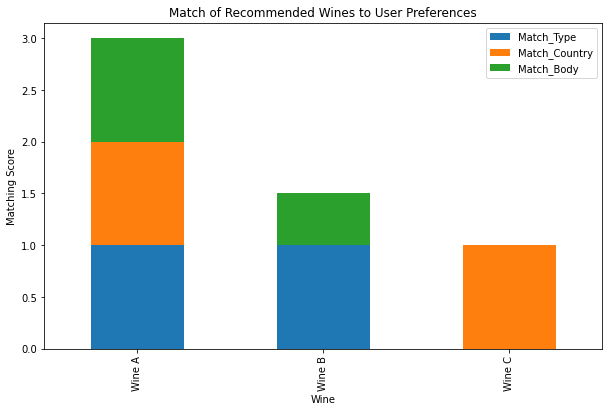

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for wine recommendations and user preferences
# 1 = wine type matches user preference
# 0.5 = Partial match for body
# 0 = no match

data = {
    'Wine': ['Wine A', 'Wine B', 'Wine C'],
    'Match_Type': [1, 1, 0],  
    'Match_Country': [1, 0, 1],  
    'Match_Body': [1, 0.5, 0]  
}

df = pd.DataFrame(data)

df.set_index('Wine').plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Match of Recommended Wines to User Preferences')
plt.ylabel('Matching Score')
plt.show()


### Baseline Comparison

To better understand the effectiveness of the content-based recommender system, it is helpful to compare the performance of the system with a simple baseline.

**Baseline:** A random recommender system would suggest wines without considering any user preferences or wine features, leading to irrelevant suggestions. A naive system like this would likely result in significantly lower precision, recall, and overall user satisfaction, as it lacks any personalization or understanding of user tastes, despite potential diversity within the recommendations. The recommendations would be essentially arbitrary, with no alignment between the user’s historical preferences and the wines being suggested.

**Improvement in Explanations**: By contrast, the content-based filtering system used here leverages wine features such as type, body, and country to make more informed recommendations. These features allow the system to align the suggested wines with the user’s preferences more effectively, even though the dataset is limited and personal preferences are generalized. This structured approach improves both precision and recall (even if not by much) compared to random recommendations, leading to a more relevant and personalized experience for the user.


### Ethical and Privacy Considerations
It is important to address the ethical and privacy aspects of this recommender system. In accordance with privacy guidelines, personal user data, such as specific preferences or demographic information (e.g., gender, location, or individual wine consumption history), is not collected or used in this system. The recommendations are generated solely based on the available dataset of wine features and generalized user preferences derived from rating data.

Impact of Generalization: As a result, the recommendations provided by this system are somewhat generalized and may lack the personalization that could be achieved with more detailed user-specific data. This generalization can affect the overall precision and recall of the system. It is important to consider this limitation when evaluating the system’s performance, as it may explain the lower precision and recall metrics observed in the evaluation results.

By avoiding the collection of personal data, the system maintains a strong commitment to user privacy while still aiming to offer meaningful recommendations based on available wine characteristics.